# Librosa
Use librosa library to process audio files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn import preprocessing

## Explore audio file

In [2]:
# calculate time series from selected audio file
y, sr = librosa.load('data/RAVDESS/03-01-08-02-01-02-11.wav')
librosa.core.get_duration(y=y)

3.1031292517006803

In [3]:
ipd.Audio(y, rate=sr)

### Plot time series

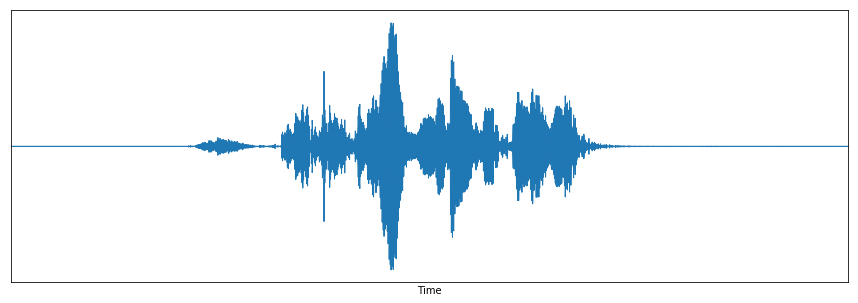

In [27]:
plt.figure(figsize=(15, 5))
plt.xticks([])
plt.yticks([])
librosa.display.waveplot(y, sr=sr);

### Set librosa parameters

In [31]:
# sampling rate
sr

22050

In [32]:
offset = 0.5 # time (s) to offset audio file start
duration = 2.5 # selected duration for each file (s)

n_mfcc = 13 # number of cepstral coefs to return
frame_size = 0.025 # window size (s)
n_fft = int(frame_size*sr)
frame_stride = 0.01 # stride size (s)
hop_length = int(frame_stride*sr)

### MFCC
Calculate Mel-Frequency Cepstral Coefficients

In [33]:
# return matrix of # mfccs x # frames
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

In [37]:
# eliminate lowest row of coefficients
mfccs = mfccs[1:]

### Plot MFCC features

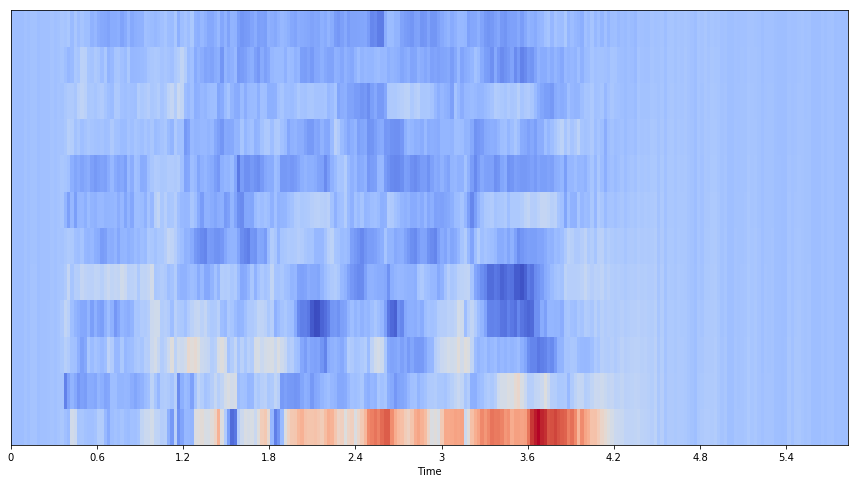

In [38]:
plt.figure(figsize=(15, 8))
plt.xticks([])
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [39]:
# standard scaling of coefficents - 0 mean and unit variance
mfccs_scale = preprocessing.scale(mfccs, axis=1)

### Plot scaled MFCC plot

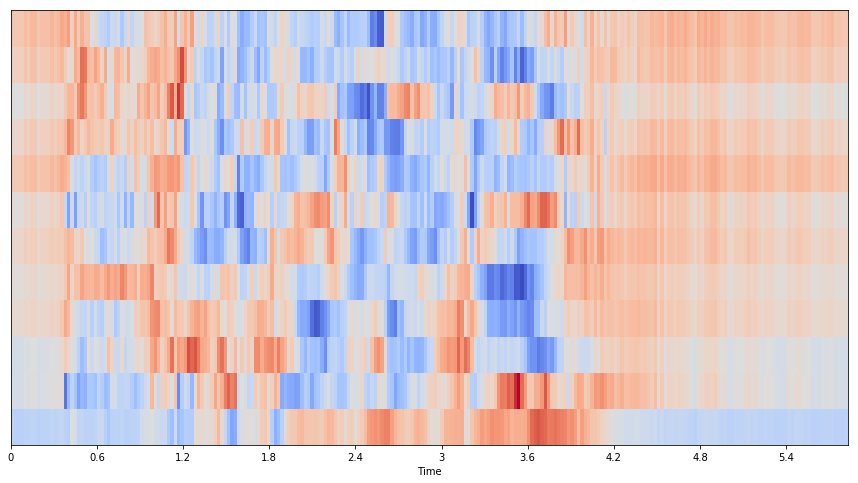

In [40]:
plt.figure(figsize=(15, 8))
librosa.display.specshow(mfccs_scale, sr=sr, x_axis='time')